### 3.3 tourists data visualization

In [1]:
import pandas as pd
df = pd.read_excel('./data/tourists/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [2]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Chech your OS system')

In [3]:
import matplotlib.pyplot as plt

In [5]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


> `시계열 그래프` 그리기

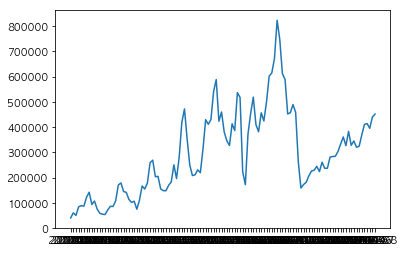

In [6]:
# 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광'])  # x축, y축
plt.show()

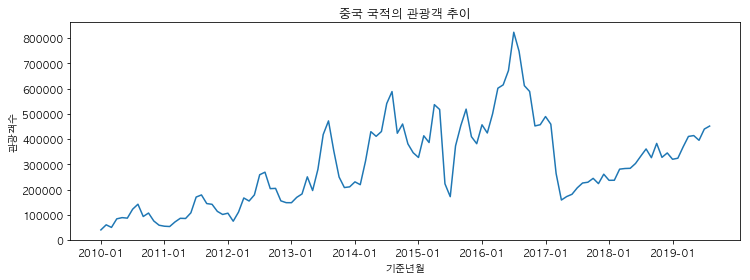

In [11]:
# 시계열 그래프 그리기 2

## 그래프 크기 조절
plt.figure(figsize = (12, 4))  # 가로 12인치, 세로 4인치

## 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])  # x축 = 기준년월, y축 = 관광

## 그래프 타이틀, x축, y축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x축 눈금값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', 
            '2016-01', '2017-01', '2018-01', '2019-01'])  # 그래프에 표시할 x축 눈금값 지정

## 그래프 표현하기
plt.show()

> `시계열 그래프 해석`    
계절적인 패턴이 존재하는지(Seasonality), 추세(Trend)가 어떤지, 큰 변화가 있었는지(Event) 살펴보고 변화의 원인은 무엇인지 생각해보기
1. (Trend) 2010년부터 2016년까지 관광객 수가 꾸준히 증가하는 추세
2. (Event) 2017년 초에 관광객 수가 큰 폭으로 감소
3. (Trend) 2017년 중순부터 관광객 수가 완만하게 증가하는 추세
4. (Seasonality) 매년 여름에 관광객 수가 최댓값을 가짐
5. (Event) 단, 2015년 여름에는 관광객 수가 큰 폭으로 감소

In [12]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 만들기
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

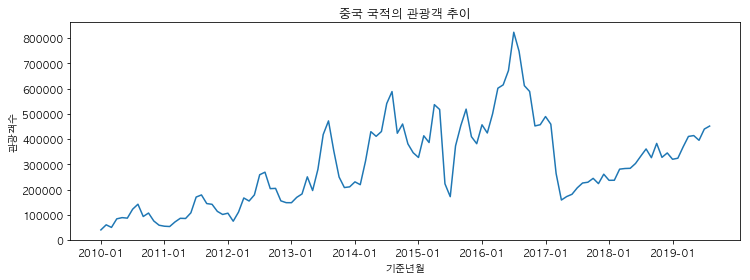

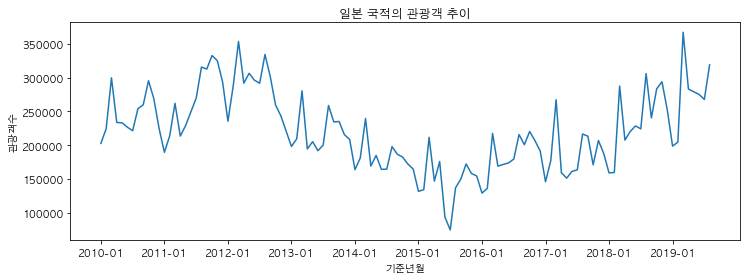

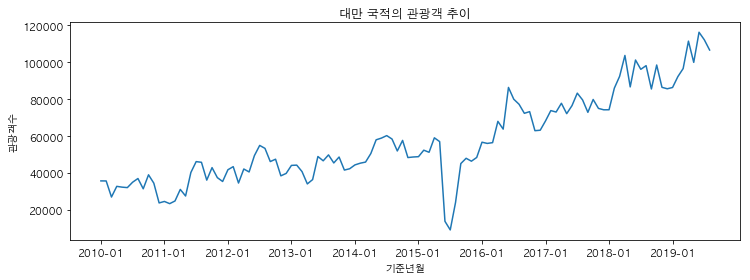

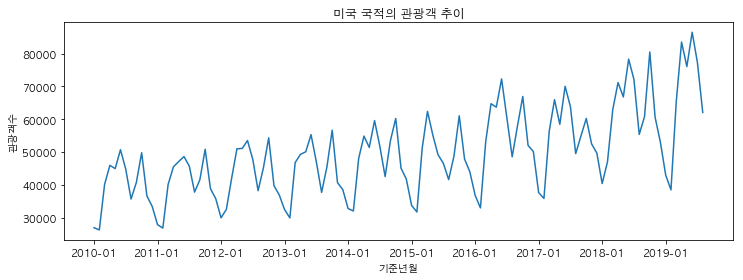

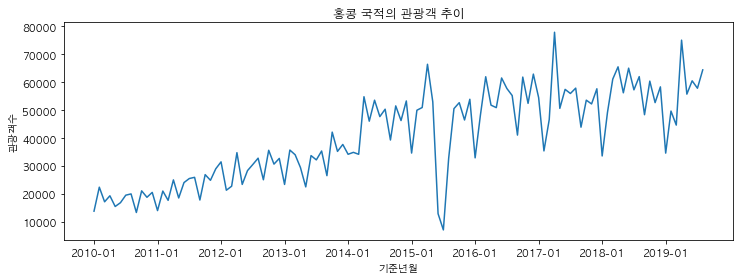

In [16]:
# 반복문으로 여러개 그래프 그리기
for cntry in cntry_list:
    
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # 그래프 그리기
    ## 그래프 크기 조절
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    ## 그래프 타이틀, x축, y축 이름 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    ## x축 눈금값 설정
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', 
                '2016-01', '2017-01', '2018-01', '2019-01'])
    
    ## 그래프 출력
    plt.show()

> `히트맵 그래프` 그리기    
매트릭스(matrix) 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법으로, 전체 데이터를 한눈에 파악할 수 있다는 장점이 있다.    
seaborn 라이브러리에서 지원(matplotlib 지원x)

In [17]:
# x축에는 월(month), y축에는 연도(year)를 넣고, 그래프 내용에는 관광객 숫자 넣기
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [18]:
# 기준년월을 연도와 월로 구분하기
df['연도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),연도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


`slice()` 함수는 `문자형 값에만 적용`이 가능한데, df['기준년월']은 Series 형태이므로, str함수를 사용해서 Series의 값들을 문자형으로 바꿔주어야 한다.

In [19]:
# 중국인 관광객 필터링
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),연도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [20]:
# df_filter 데이터를 pivot_table() 함수를 이용해서 매트릭스 형태로 변환하기
df_pivot = df_filter.pivot_table(values = '관광',  # values = 표 내부값
                                 index = '연도',  # index = Y축 
                                 columns = '월')  # columns = X축
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


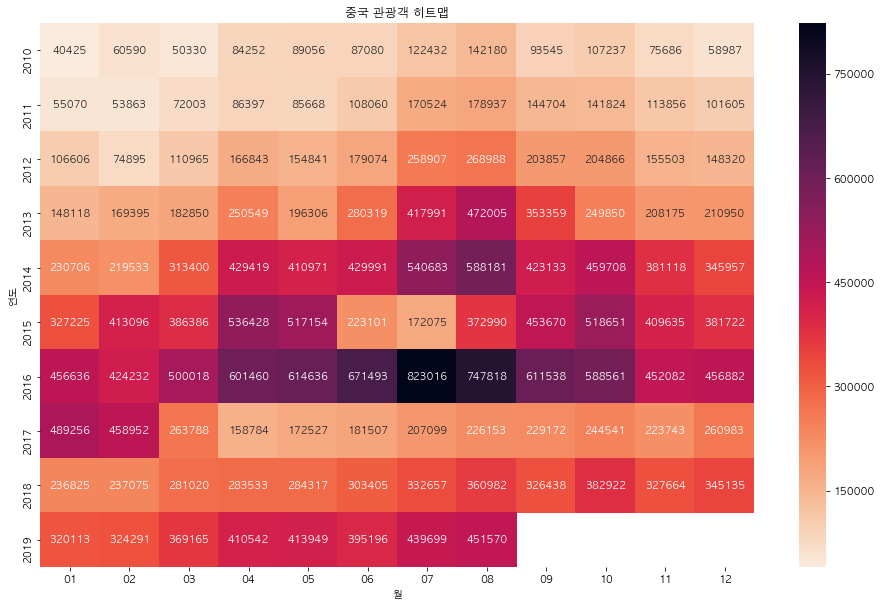

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기
plt.figure(figsize = (16, 10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot,  # 데이터 지정
            annot = True,  # 히트맵 그래프에 각 칸에 실제 값을 표시
            fmt = '.0f',  # 숫자 형태를 소수점이 없는 실수형으로 표현
            cmap = 'rocket_r')  # 그래프의 색깔 조합 지정

# 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

# 그래프 표현
plt.show()

> `히트맵 그래프 해석`     
계절적인 패턴이 존재하는지(Seasonality), 추세(Trend)가 어떤지, 큰 변화가 있었는지(Event) 살펴보고 변화의 원인은 무엇인지 생각해보기
1. (Trend) 위(2010년 1월)에서 아래(2017년 2월)로 오면서 색까링 진해지는 것으로 보아 2010년 1월부터 2017년 2월까지 관광객수가 꾸준히 증가하는 추새
2. (Seasonality) 각 연도를 기준으로 봤을 때, 7~8월이 대체로 진한 색깔로서 가장 관광객이 많이 방문하는 패턴을 보이며, 그 다음으로는 4월, 10월이 높은 패턴이 나타남
3. (Event) 2015년 6~8월에 관광객 수가 적음
4. (Event) 2017년 3월~6월까지 관광객수가 매우 적음
5. (Trend) 2017년 7월부터 2019년 4월까지 관광객 수가 점차 많아짐

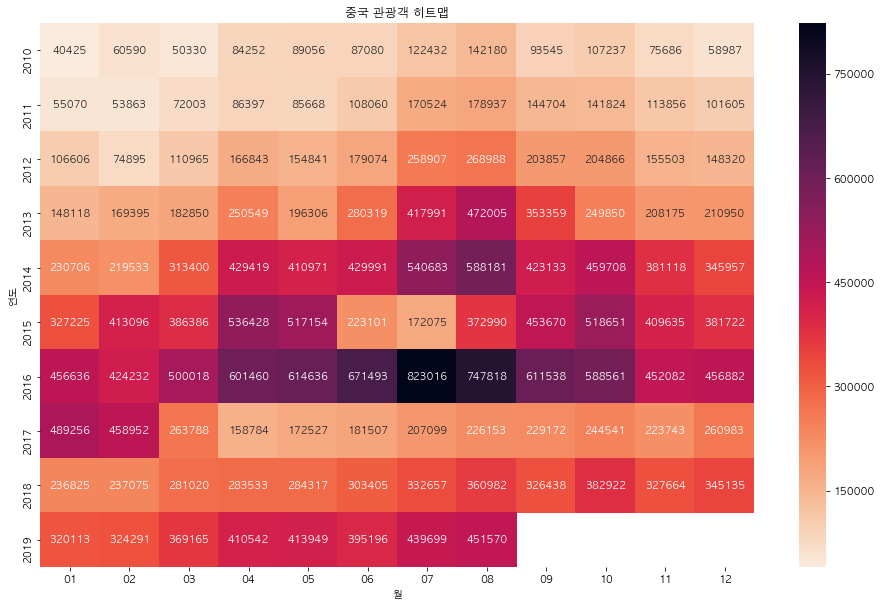

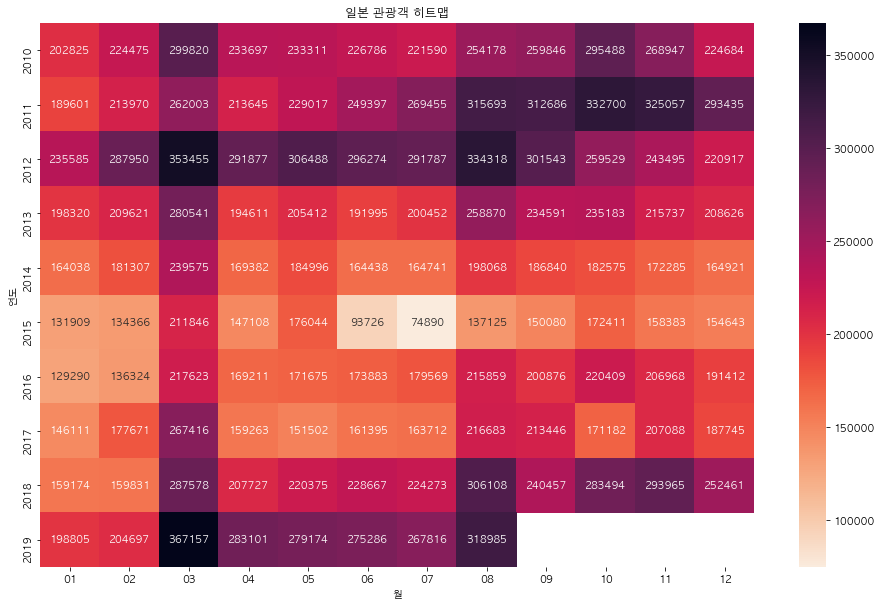

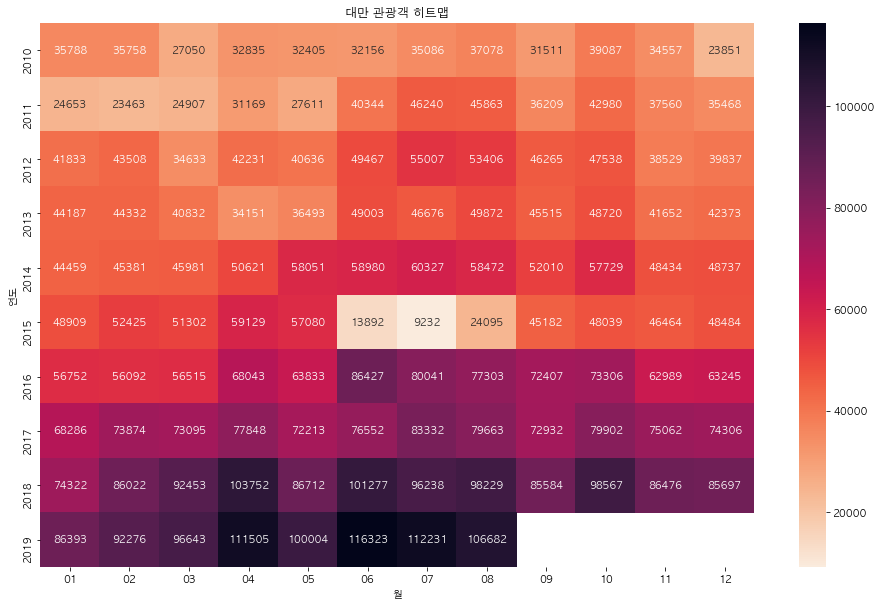

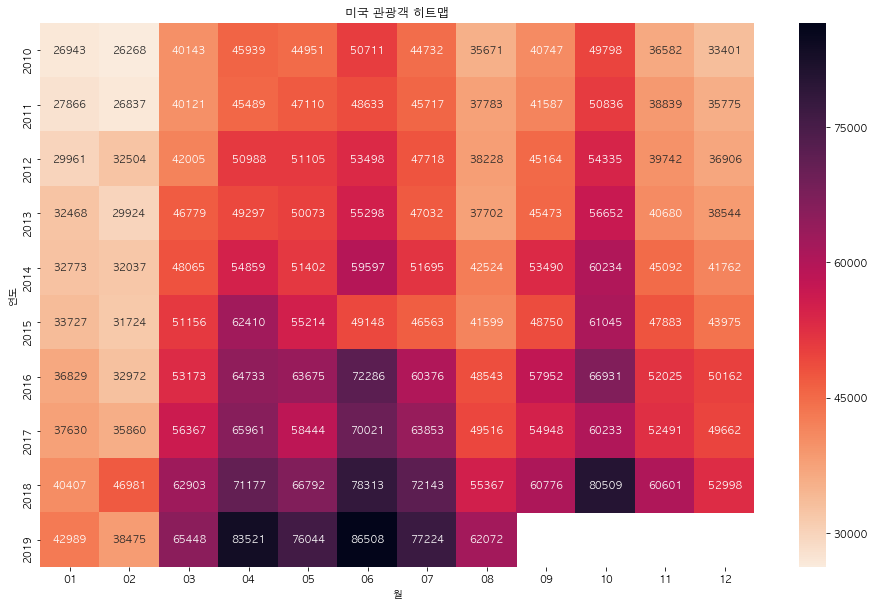

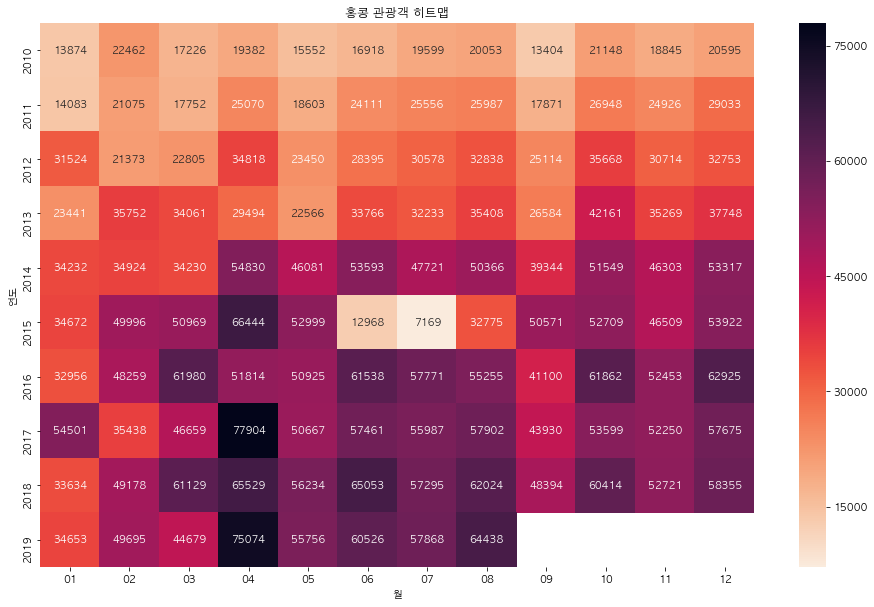

In [23]:
# 반복문으로 상위 5개국에 대한 히트맵 그리기
for cntry in cntry_list:
    
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광', index = '연도', columns = '월')


    # 그래프 크기 설정
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')  

    # 그래프 타이틀 달기
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현
    plt.show()

> `전체 해석`     
1. (Seasonality) 중국인 관광객은 `'여름 > 봄,가을 > 겨울'` 순으로 많이 방문한다는 사실을 알 수 있다.
2. (Trend) 중국인 관광객 숫자가 계속해서 증가하고 있다.
3. (Event) 2015년 여름(6-8월)과 2017년 3월에는 어떤 일이 있었기에 관광객 수가 급감했을까?     
3-1. 2015년 6-8월에는 메르스 여파 때문인 것을 알 수 있다.(같은 시기에 일본, 대만, 홍콩도 급감)    
3-2. 2017년 3월에는 중국의 사드 보복 조치로 관광객 수가 줄어든 것을 알 수 있다.
4. 메르스 여파는 일시적인 관광객 감소를 가져왔지만, 사드 보복 조치는 2017년 3월 발생한 이후로 그 여파가 아직도 지속되는 것으로 나타난다. 긍정적인 부분은 사드 보복 조치 이전만큼은 아니지만, 점차 관광객 수가 증가하고 있다는 점이다.